# 데이터 불러오기

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd
from sympy import symbols, Eq, solve, diff
from patsy import dmatrix

In [46]:
df = pd.read_csv('크리에이터.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507082 entries, 0 to 507081
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           507082 non-null  object 
 1   keyword_raw  507082 non-null  object 
 2   keyword      507082 non-null  object 
 3   price        507082 non-null  float64
 4   quantity     507082 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 19.3+ MB


# 데이터 전처리

In [48]:
# 불필요 열 제거

df = df.drop(columns = ['id', 'keyword_raw'])

Adjusted Data Stats:
               price       quantity
count  427433.000000  427433.000000
mean        4.817087       3.383468
std         2.125804       3.822260
min         0.000000       1.000000
25%         3.000000       1.000000
50%         4.000000       2.000000
75%         6.000000       4.000000
max        12.000000      19.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_18268\2476791193.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, result_row], axis=0)


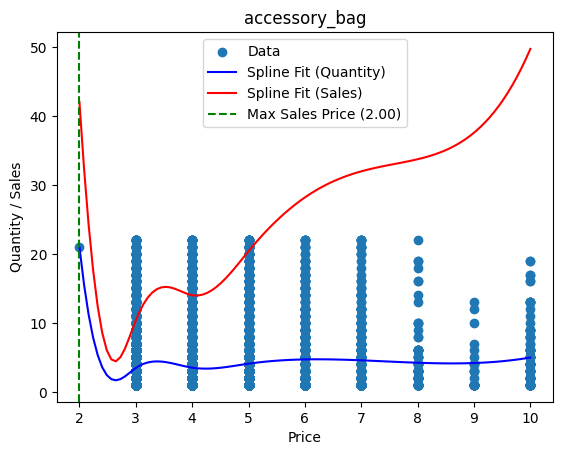

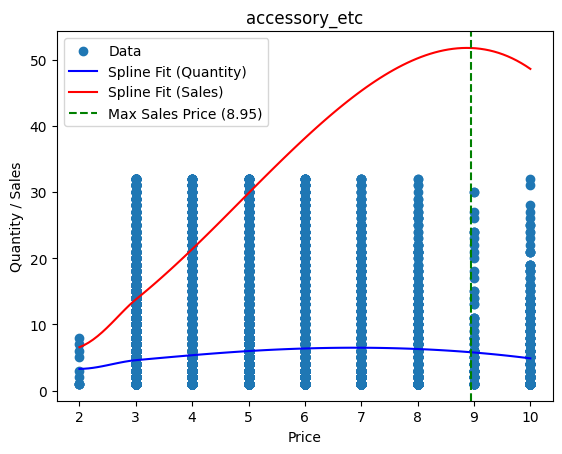

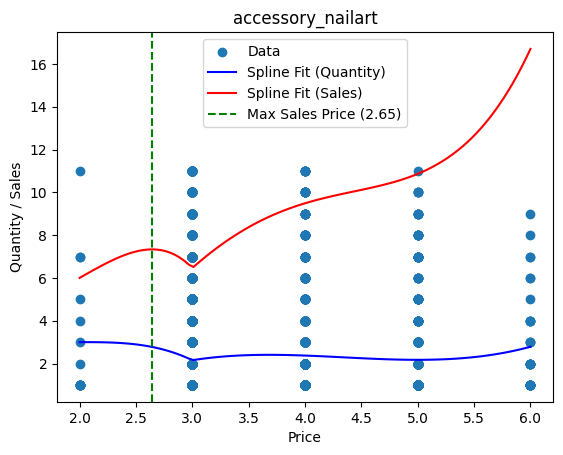

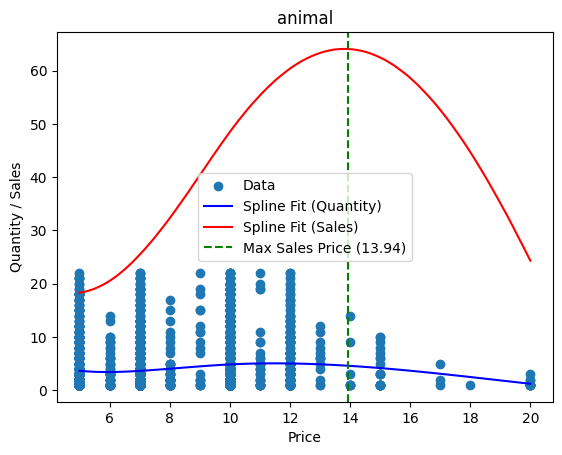

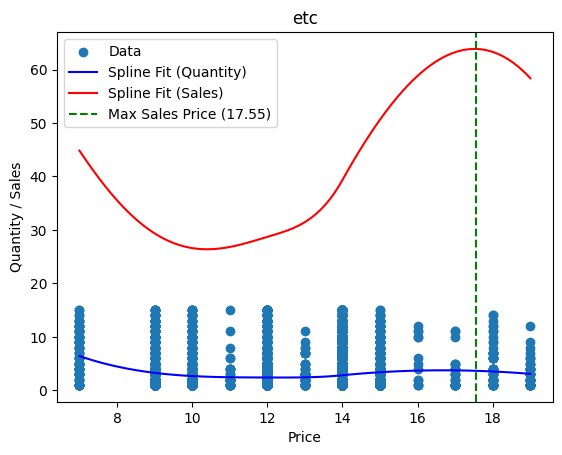

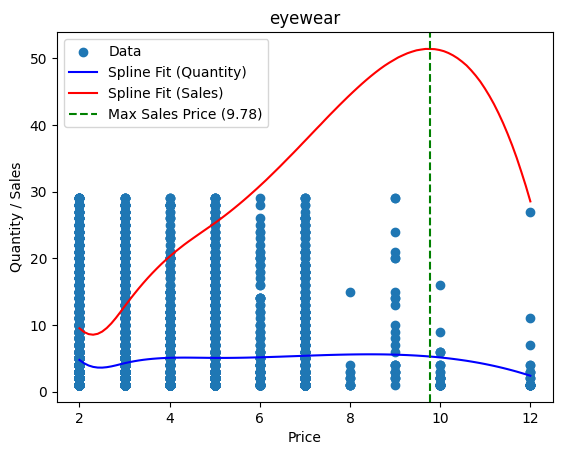

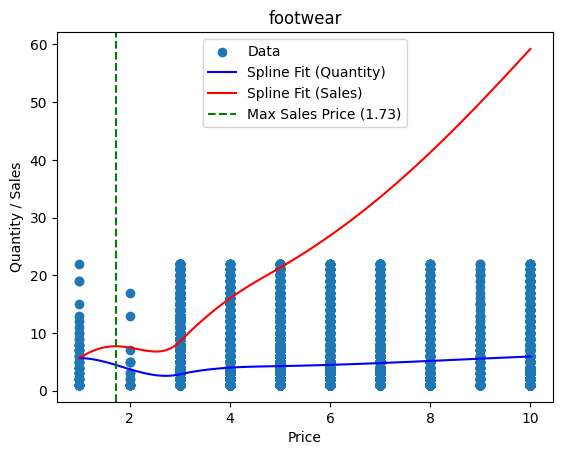

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:1286: RuntimeWarning: invalid value encountered in divide
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: invalid value encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:1314: RuntimeWarning: invalid value encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n
C:\Users\USER\AppData\Local\Temp\ipykernel_18268\2476791193.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain 

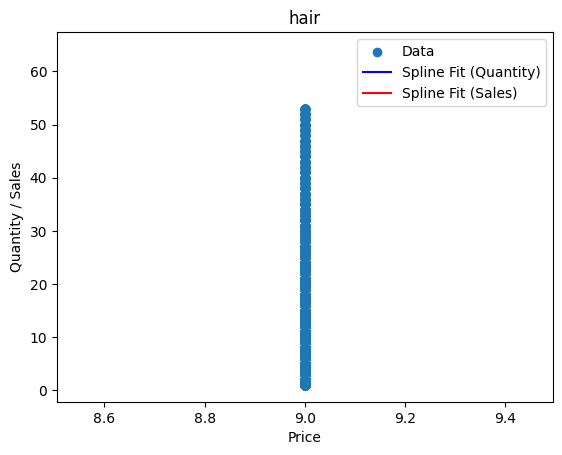

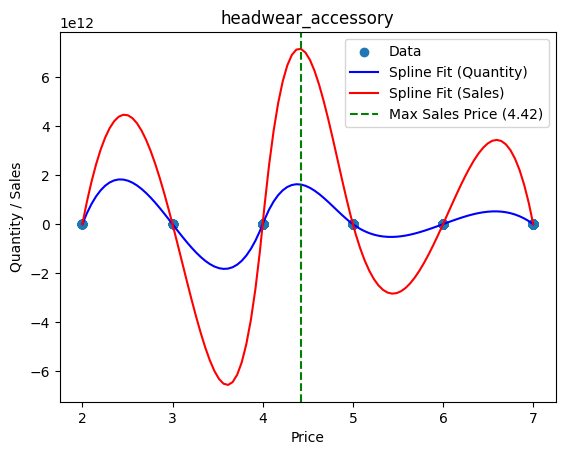

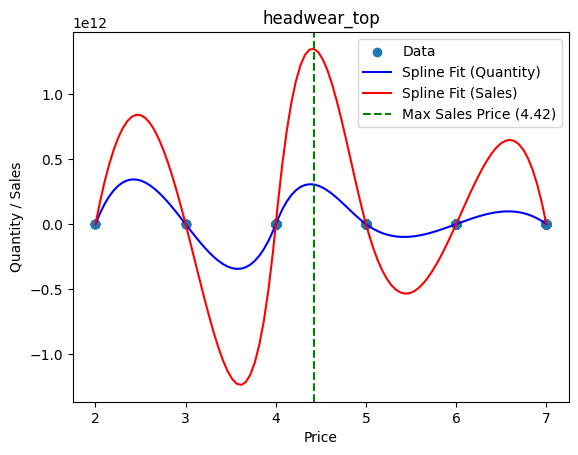

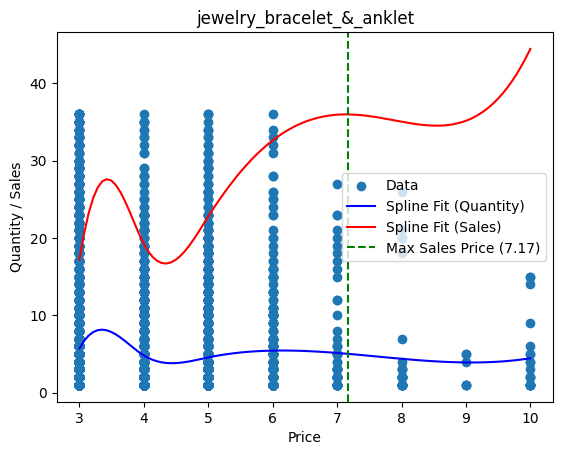

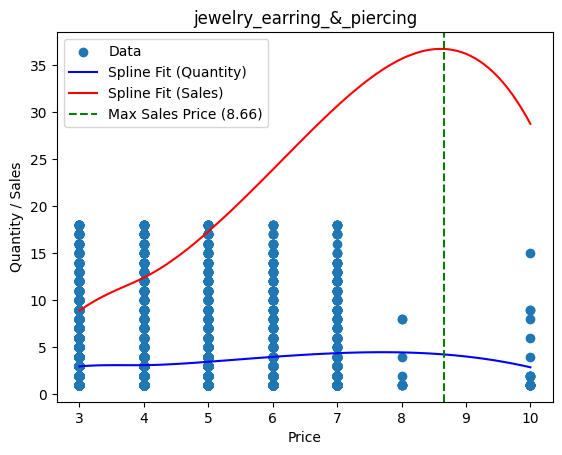

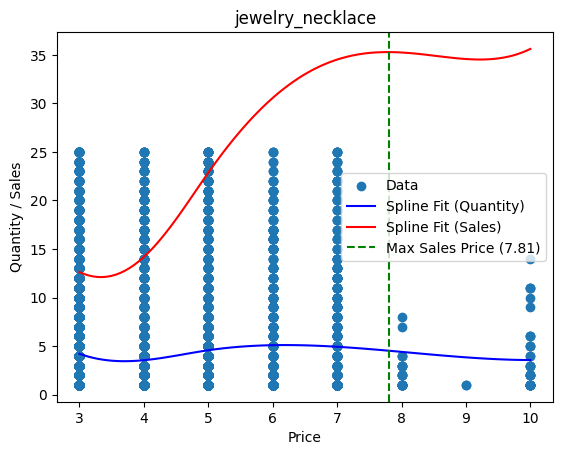

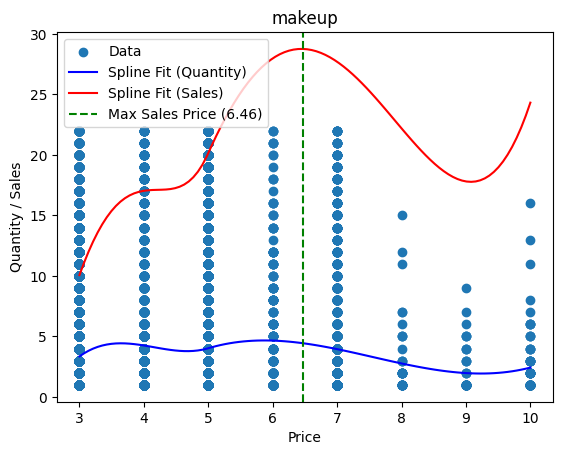

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:1286: RuntimeWarning: invalid value encountered in divide
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: invalid value encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:1314: RuntimeWarning: invalid value encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n
C:\Users\USER\AppData\Local\Temp\ipykernel_18268\2476791193.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain 

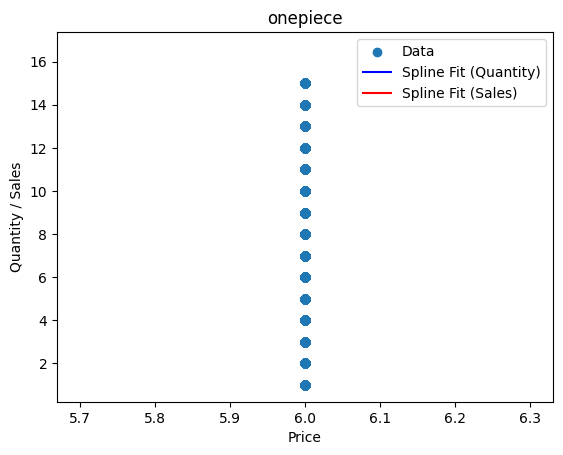

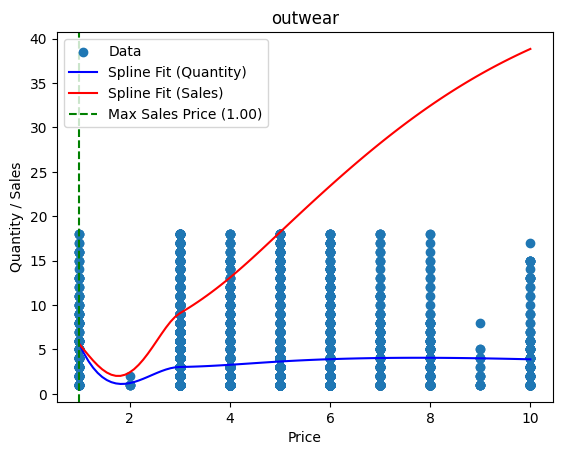

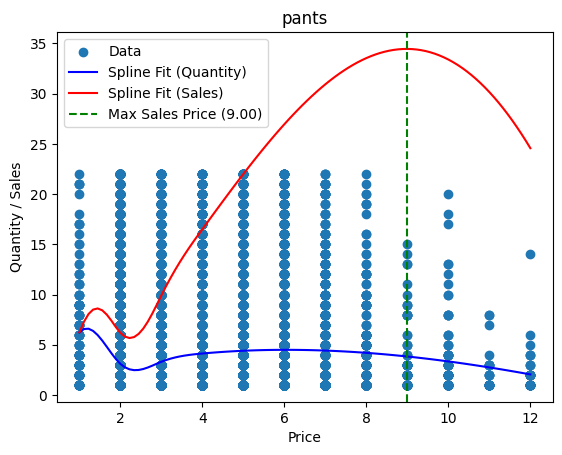

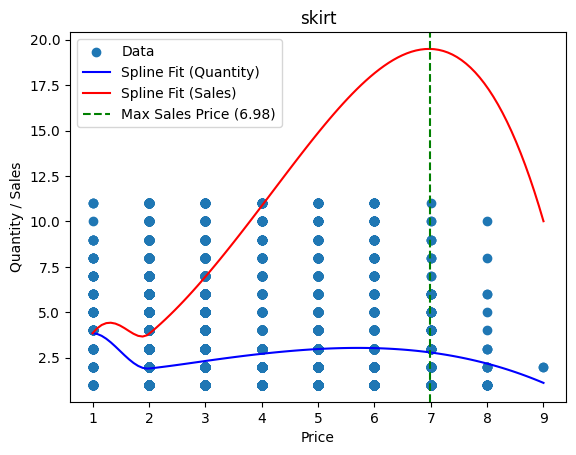

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:1286: RuntimeWarning: invalid value encountered in divide
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: invalid value encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:1314: RuntimeWarning: invalid value encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n
C:\Users\USER\AppData\Local\Temp\ipykernel_18268\2476791193.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain 

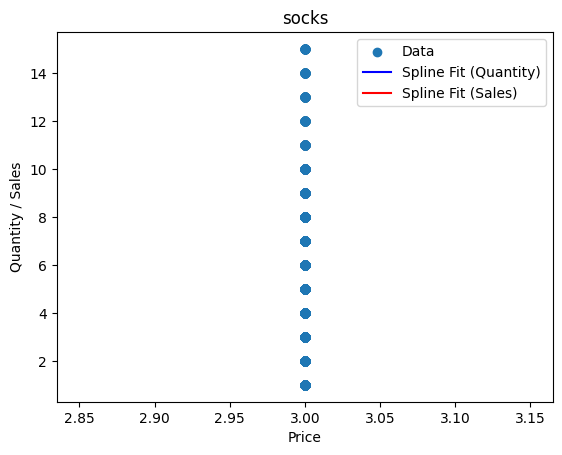

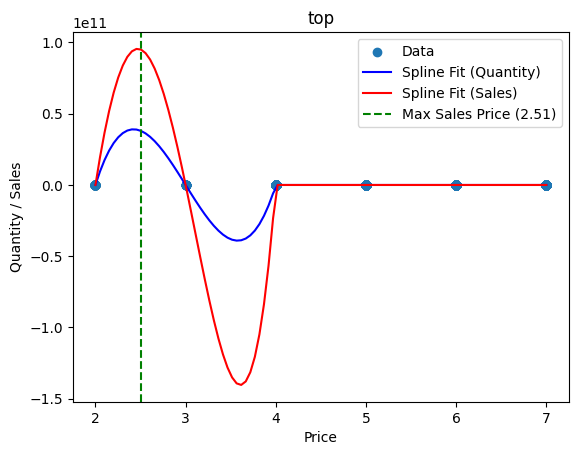

                      Category  \
0                accessory_bag   
1                accessory_etc   
2            accessory_nailart   
3                       animal   
4                          etc   
5                      eyewear   
6                     footwear   
7                         hair   
8           headwear_accessory   
9                 headwear_top   
10   jewelry_bracelet_&_anklet   
11  jewelry_earring_&_piercing   
12            jewelry_necklace   
13                      makeup   
14                    onepiece   
15                     outwear   
16                       pants   
17                       skirt   
18                       socks   
19                         top   

                                  Spline_Coefficients  Max_Sales_Price  \
0   [20.99999999999935, -24.648677599749742, -14.2...         2.000000   
1   [3.2727272727245573, -2.503162200578322e-15, 1...         8.949495   
2   [3.0000000000002807, 3.2963422026216457e-15, -...         2

In [49]:
import pandas as pd
import numpy as np
from patsy import dmatrix
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 극단치 제거 함수
def remove_outliers(df, column, iqr_multiplier=2.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 키워드별로 그룹화 후 극단치 제거
filtered_data = {}
for keyword, group in df.groupby('keyword'):
    group = remove_outliers(group, 'price')  # 가격 극단치 제거
    group = remove_outliers(group, 'quantity')  # 판매량 극단치 제거
    filtered_data[keyword] = group

def remove_outliers_adjusted(df, column, iqr_multiplier=2.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 새로운 기준으로 극단치 제거 (IQR 범위 2배)
df_adjusted = df.copy()
df_adjusted = remove_outliers_adjusted(df_adjusted, 'price', iqr_multiplier=2)
df_adjusted = remove_outliers_adjusted(df_adjusted, 'quantity', iqr_multiplier=2)

# 제거 전후 비교
adjusted_stats = df_adjusted[['price', 'quantity']].describe()
print("Adjusted Data Stats:")
print(adjusted_stats)

# 필터링된 데이터를 합치기
df_filtered = pd.concat(filtered_data, axis=0)

# 필터링된 데이터 기준으로 그룹화
groups = df_filtered.groupby('keyword')

# 결과 저장 데이터프레임 초기화
result_df = pd.DataFrame(columns=['Category', 'Spline_Coefficients', 'Max_Sales_Price', 'Max_Sales'])

# Cubic Spline Regression 수행
for category, group in groups:
    price = group['price']
    quantity = group['quantity']
   
    # 자연 스플라인 적용
    knots = [price.quantile(0.25), price.quantile(0.5), price.quantile(0.75)]
    transformed_x = dmatrix(f"bs(price, knots={knots}, degree=3, include_intercept=False)",
                            {"price": price}, return_type='dataframe')

    # 회귀 모델 적합
    model = sm.OLS(quantity, transformed_x).fit()
    spline_coefficients = model.params.values

    # 예측 및 매출 계산
    x = np.linspace(price.min(), price.max(), 100)
    transformed_x_pred = dmatrix(f"bs(x, knots={knots}, degree=3, include_intercept=False)",
                                 {"x": x}, return_type='dataframe')
    predicted_quantity = model.predict(transformed_x_pred)
    predicted_sales = x * predicted_quantity  # 매출 = 가격 * 판매량

    # 매출의 미분 계산
    derivative = np.gradient(predicted_sales, x)

    # 매출이 감소하는 모든 지점 확인
    descending_points = np.where(derivative < 0)[0]

    # 각 지점에서 매출 비교하여 최대값 찾기
    if len(descending_points) > 0:
        max_index = descending_points[np.argmax(predicted_sales[descending_points])]
        max_sales_price = x[max_index]
        max_sales = predicted_sales[max_index]
    else:
        max_sales_price = None
        max_sales = None

    # 결과 저장
    result_row = pd.DataFrame([[category, spline_coefficients, max_sales_price, max_sales]],
                              columns=result_df.columns)
    result_df = pd.concat([result_df, result_row], axis=0)

    # 시각화
    plt.scatter(price, quantity, label='Data')
    plt.plot(x, predicted_quantity, color='blue', label='Spline Fit (Quantity)')
    plt.plot(x, predicted_sales, color='red', label='Spline Fit (Sales)')

    if max_sales_price is not None:
        plt.axvline(
            x=max_sales_price, 
            color='green', 
            linestyle='--', 
            label=f'Max Sales Price ({max_sales_price:.2f})'
        )
    
    plt.title(f'{category}')
    plt.xlabel('Price')
    plt.ylabel('Quantity / Sales')
    plt.legend()
    plt.show()

# 결과 출력
result_df.reset_index(drop=True, inplace=True)
print(result_df)

# 데이터 시각화

In [50]:
# 극단치 제거 전후 데이터 비교
original_stats = df[['price', 'quantity']].describe()
filtered_stats = df_filtered[['price', 'quantity']].describe()

print("Original Data Stats:")
print(original_stats)
print("\nFiltered Data Stats:")
print(filtered_stats)



Original Data Stats:
               price       quantity
count  507082.000000  507082.000000
mean        5.575765      20.142395
std        12.257699     136.204901
min         0.000000       1.000000
25%         3.000000       1.000000
50%         4.000000       2.000000
75%         6.000000       7.000000
max       500.000000   34669.000000

Filtered Data Stats:
               price       quantity
count  424578.000000  424578.000000
mean        4.954885       3.715762
std         2.519423       5.020516
min         1.000000       1.000000
25%         3.000000       1.000000
50%         4.000000       2.000000
75%         6.000000       4.000000
max        20.000000      53.000000


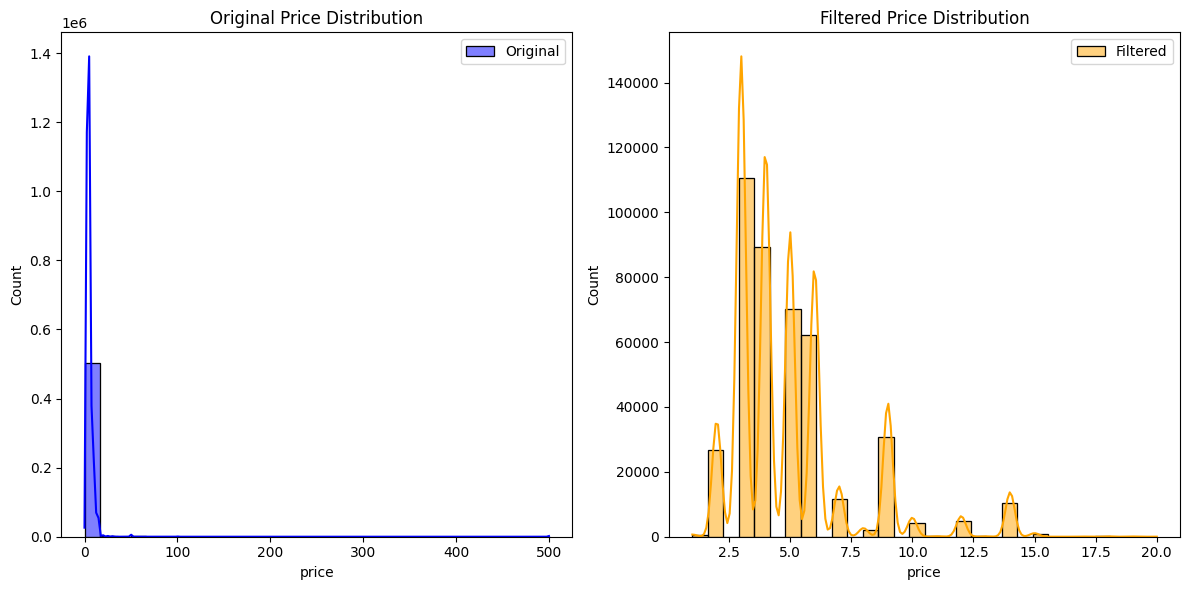

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히스토그램으로 데이터 분포 비교
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['price'], bins=30, kde=True, ax=axes[0], color='blue', label='Original')
axes[0].set_title('Original Price Distribution')
axes[0].legend()

sns.histplot(df_filtered['price'], bins=30, kde=True, ax=axes[1], color='orange', label='Filtered')
axes[1].set_title('Filtered Price Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()





Removed Data Stats:
              price      quantity
count  10787.000000  10787.000000
mean       9.982664    449.417818
std       34.242235    787.298908
min        0.000000      1.000000
25%        4.000000     96.000000
50%        5.000000    223.000000
75%        8.000000    554.000000
max      500.000000  34669.000000


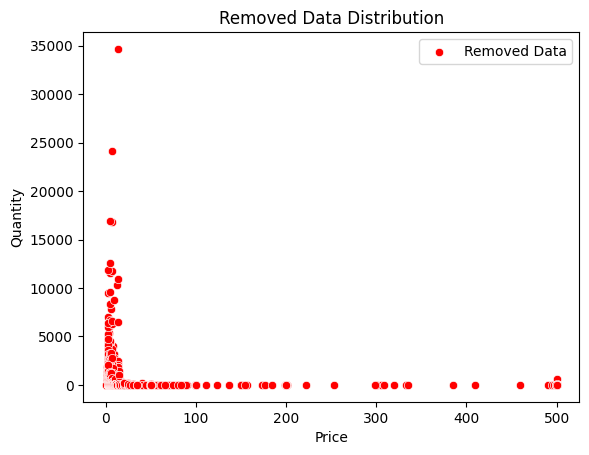

In [52]:
# 제거된 데이터 확인
removed_data = pd.concat([df, df_filtered]).drop_duplicates(keep=False)

print("Removed Data Stats:")
print(removed_data[['price', 'quantity']].describe())

# 제거된 데이터 시각화
sns.scatterplot(x=removed_data['price'], y=removed_data['quantity'], color='red', label='Removed Data')
plt.title('Removed Data Distribution')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [53]:
def remove_outliers_adjusted(df, column, iqr_multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 새로운 기준으로 극단치 제거 (IQR 범위 2배)
df_adjusted = df.copy()
df_adjusted = remove_outliers_adjusted(df_adjusted, 'price', iqr_multiplier=2)
df_adjusted = remove_outliers_adjusted(df_adjusted, 'quantity', iqr_multiplier=2)

# 제거 전후 비교
adjusted_stats = df_adjusted[['price', 'quantity']].describe()
print("Adjusted Data Stats:")
print(adjusted_stats)



Adjusted Data Stats:
               price       quantity
count  427433.000000  427433.000000
mean        4.817087       3.383468
std         2.125804       3.822260
min         0.000000       1.000000
25%         3.000000       1.000000
50%         4.000000       2.000000
75%         6.000000       4.000000
max        12.000000      19.000000


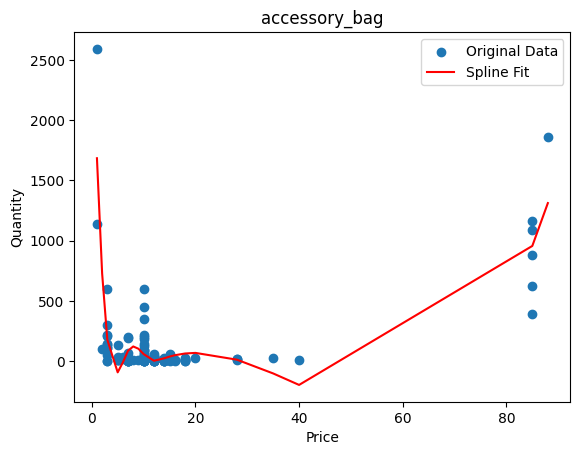

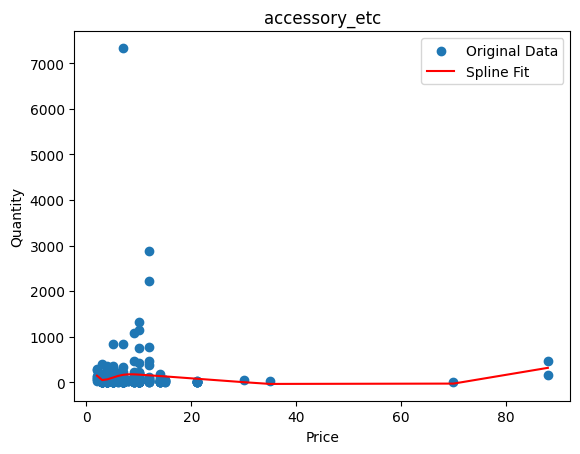

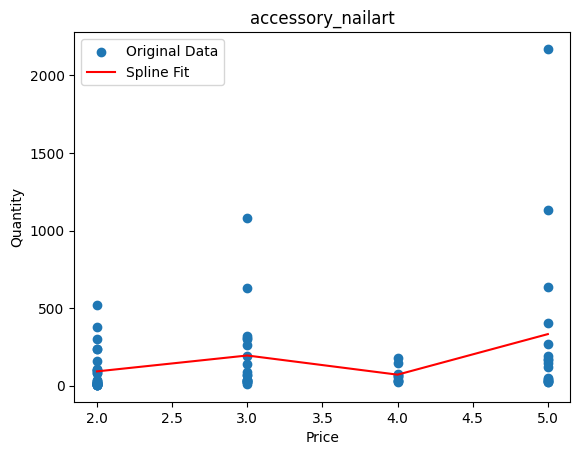

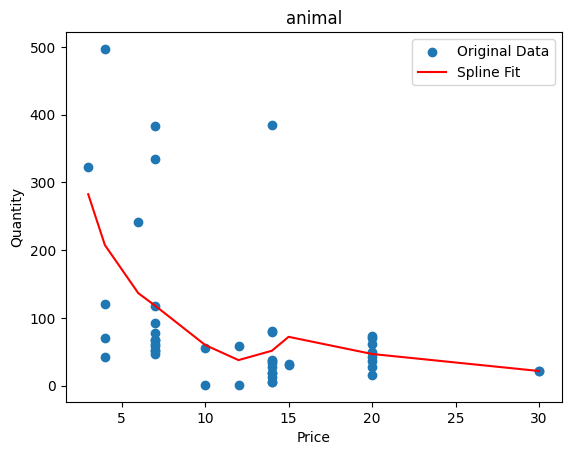

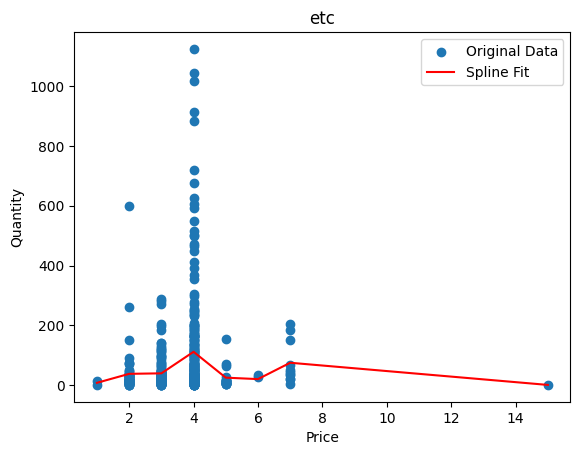

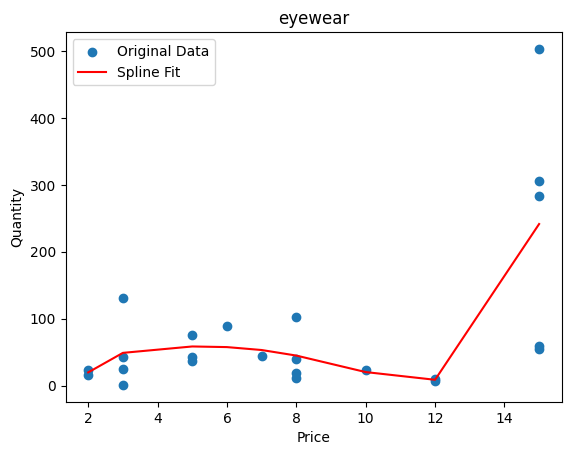

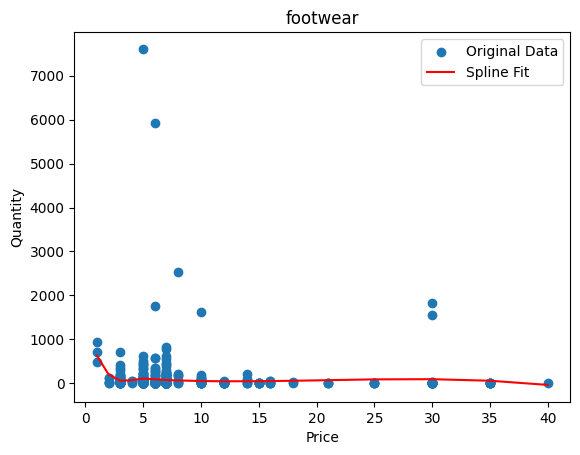

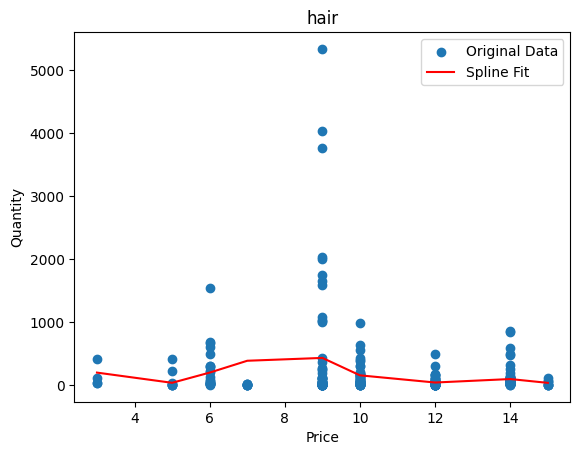

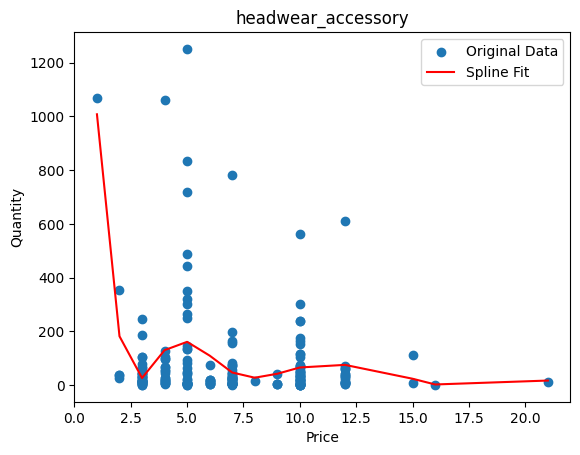

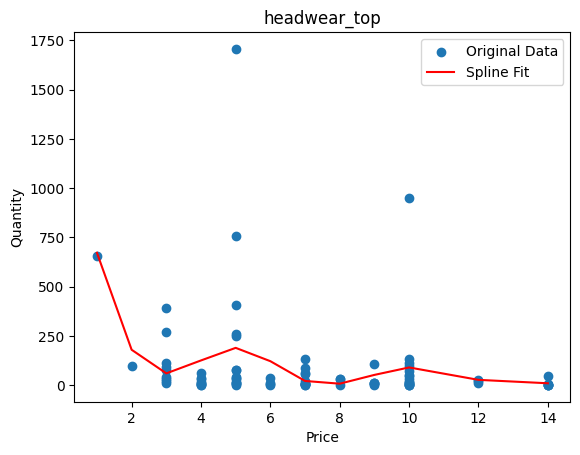

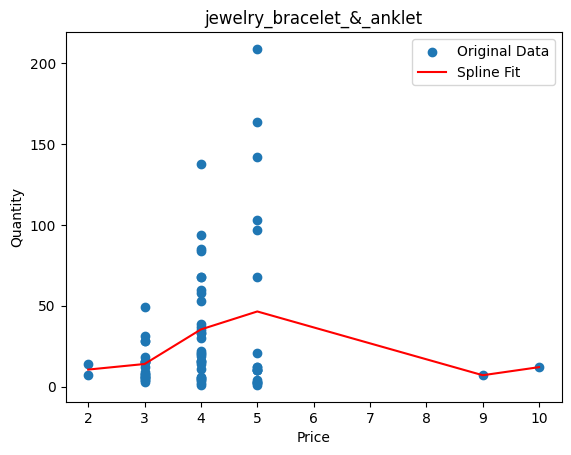

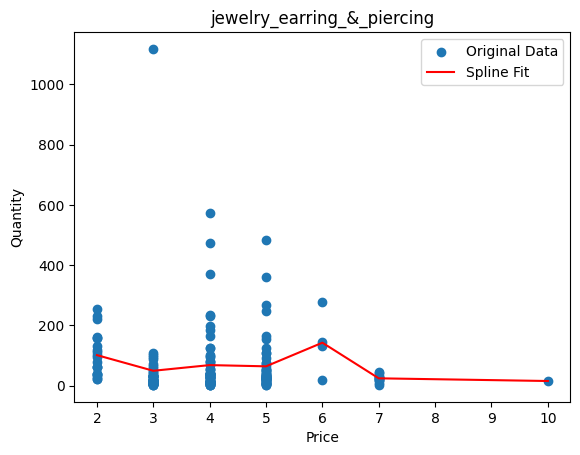

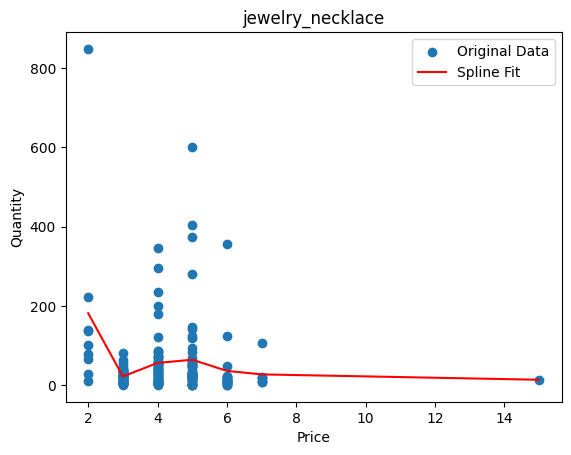

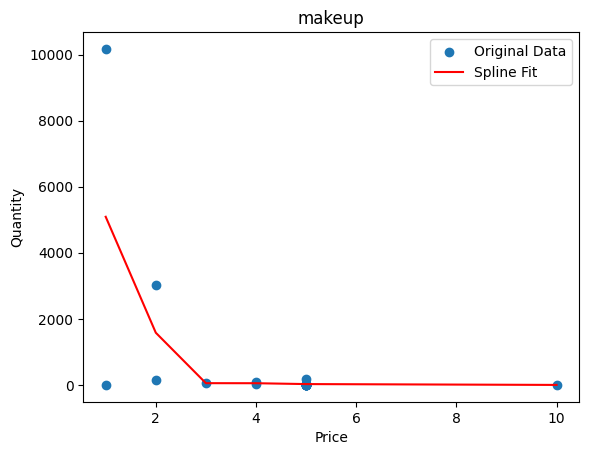

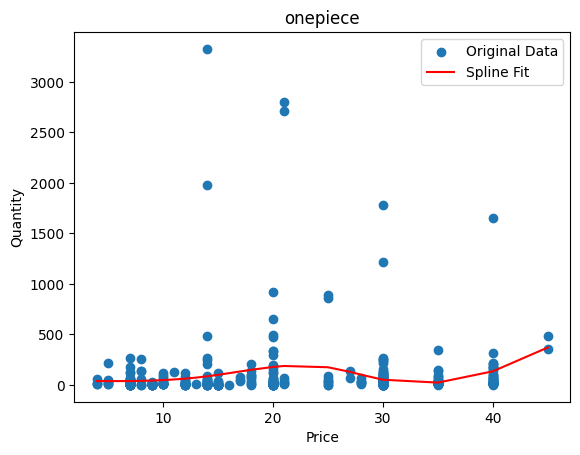

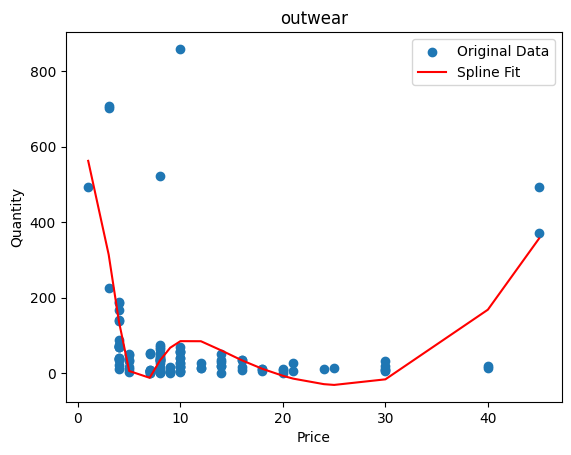

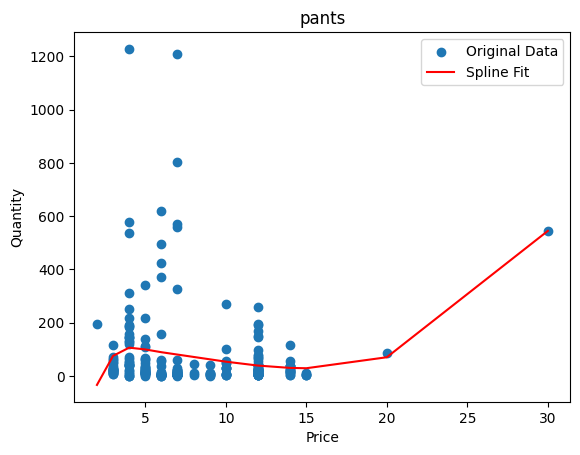

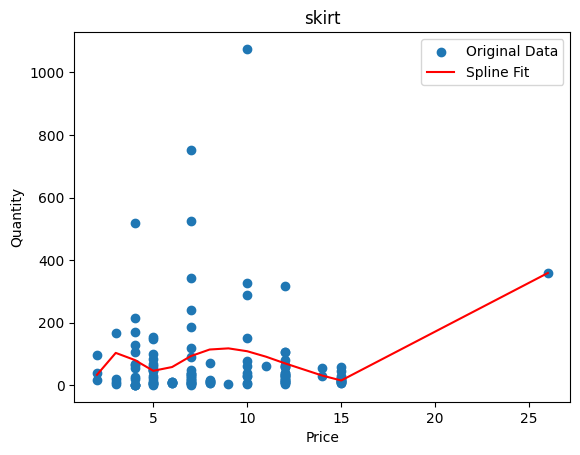

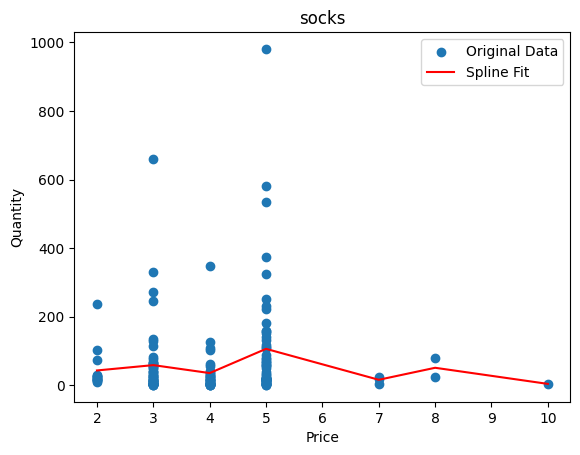

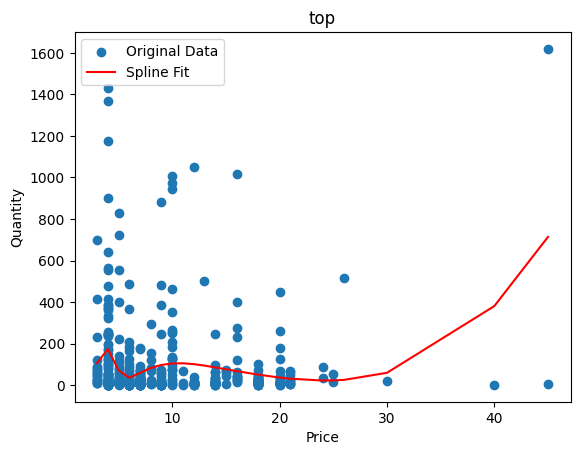

In [57]:
# 원본 데이터로 Cubic Spline 재분석
groups_original = df.groupby('keyword')

for category, group in groups_original:
    price = group['price']
    quantity = group['quantity']
   
    knots = [price.quantile(0.25), price.quantile(0.5), price.quantile(0.75)]
    transformed_x = dmatrix(f"bs(price, knots={knots}, degree=3, include_intercept=False)",
                            {"price": price}, return_type='dataframe')

    model = sm.OLS(quantity, transformed_x).fit()
    predicted_quantity = model.predict(dmatrix(f"bs(price, knots={knots}, degree=3, include_intercept=False)",
                                               {"price": price}, return_type='dataframe'))
   
    plt.scatter(price, quantity, label='Original Data')
    plt.plot(price, predicted_quantity, color='red', label='Spline Fit')
    plt.title(f'{category}')
    plt.xlabel('Price')
    plt.ylabel('Quantity')
    plt.legend()
    plt.show()

# 데이터 분석

# 결과 저장

In [54]:
# CSV 파일로 저장

result_df.to_csv('제휴_수요의 가격탄력성_매출_분석_크리에이터.csv')